<a href="https://colab.research.google.com/github/BrunoAG77/superstore/blob/main/datascienceacad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/superstore.csv', sep=';')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Sales'] = df['Sales'].str.replace(',','.').astype(float)

####1) Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?


In [ ]:
offsupcont = df[df['Category'] == 'Office Supplies']
offsupcont['City'].value_counts().head(20)

,count
City,
New York City,552
Los Angeles,443
San Francisco,322
Philadelphia,312
Seattle,249
Houston,231
Chicago,187
Columbus,135
Springfield,104


#### 2) Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

In [ ]:
yearsale = df['Order Date'].value_counts().head(40)
yearsale

,count
Order Date,
2016-09-05,38
2017-09-02,36
2016-11-10,35
2017-12-01,34
2017-12-02,34
2017-12-09,33
2017-11-12,30
2017-12-08,30
2017-09-09,29


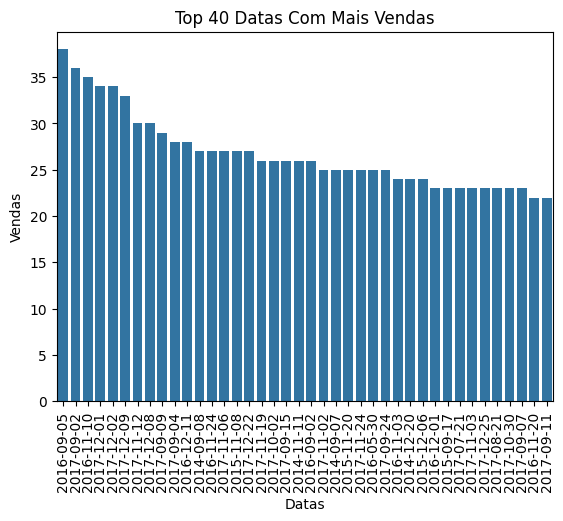

In [ ]:
sns.barplot(x=yearsale.index,y=yearsale.values)
plt.xticks(rotation=90)
plt.title('Top 40 datas com mais vendas')
plt.xlabel('Datas')
plt.ylabel('Vendas')
plt.show()

#### 3) Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [ ]:
statecont = df['State'].value_counts()
statecont

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


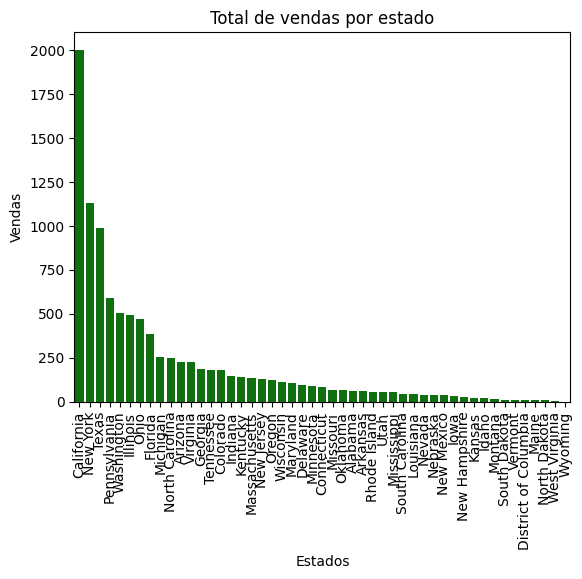

In [ ]:
sns.barplot(x=statecont.index,y=statecont.values,color='green')
plt.title("Total de vendas por estado")
plt.xlabel("Estados")
plt.ylabel("Vendas")
plt.xticks(rotation=90)
plt.show()

#### 4) Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [ ]:
top10 = df['City'].value_counts().head(10)
top10

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170


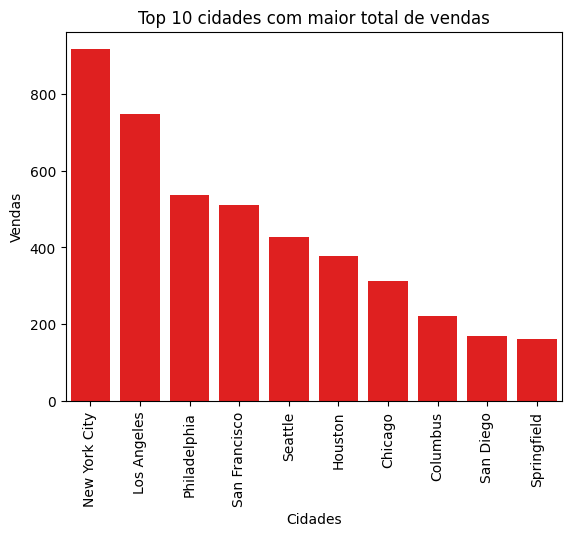

In [ ]:
sns.barplot(x=top10.index,y=top10.values,color='red')
plt.title("Top 10 cidades com maior total de vendas")
plt.xlabel("Cidades")
plt.ylabel("Vendas")
plt.xticks(rotation=90)
plt.show()

#### 5) Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.


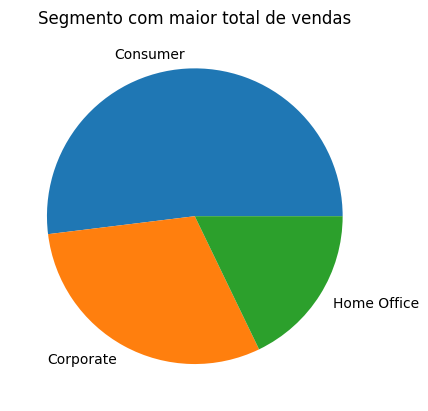

In [ ]:
plt.pie(df['Segment'].value_counts(),labels=df['Segment'].unique())
plt.title("Segmento com maior total de vendas")
plt.show()

#### 6) Qual o Total de Vendas Por Segmento e Por Ano?

In [ ]:
segmentsale = df.groupby(['Segment','Year'])['Sales'].sum()
segmentsale

Segment      Year
Consumer     2014    266096.8126
             2015    266535.9333
             2016    296863.8992
             2017    331904.6999
Corporate    2014    128434.8737
             2015    128757.3069
             2016    207106.3618
             2017    241847.8244
Home Office  2014     89715.8118
             2015     75239.2688
             2016    105235.3370
             2017    159462.7309
Name: Sales, dtype: float64

#### 7) Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?

In [ ]:
print(df[df['Sales'] > 1000.00].value_counts().sum())

468


#### 8) Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?


In [ ]:
print(df['Sales'].mean())

229.85800083049833


In [ ]:
for i, j in df.iterrows():
  if j['Sales'] > 1000.00:
    df.at[i,'Sales'] = j['Sales'] * 0.85

In [ ]:
print(df['Sales'].mean())

214.9965477646588


#### 9) Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?
Demonstre o resultado através de gráfico de linha.


In [ ]:
segmentdate = df.groupby(['Segment','Year','Month'])['Sales'].mean()
segmentdate

Segment      Year  Month
Consumer     2014  1        134.056092
                   2        110.348926
                   3        147.727856
                   4        181.231844
                   5        171.371013
                               ...    
Home Office  2017  8        170.989015
                   9        226.425081
                   10       366.187385
                   11       226.060118
                   12       211.193919
Name: Sales, Length: 144, dtype: float64

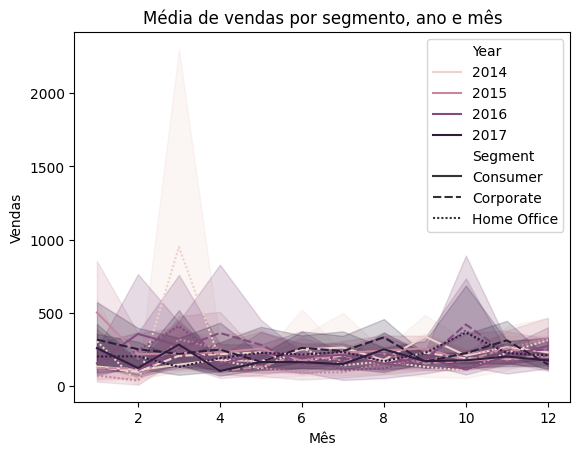

In [ ]:
sns.lineplot(x='Month', y='Sales', hue='Year', style='Segment', data=df)
plt.title('Média de vendas por segmento, ano e mês')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

#### 10) Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
Demonstre tudo através de um único gráfico.

In [ ]:
categorycont = df.groupby(['Category','Sub-Category'])['Sales'].sum()
categorycont

Category         Sub-Category
Furniture        Bookcases       107451.72246
                 Chairs          309016.92520
                 Furnishings      90859.32420
                 Tables          191646.77465
Office Supplies  Appliances      102020.74250
                 Art              26951.83840
                 Binders         186039.78115
                 Envelopes        16476.40200
                 Fasteners         3024.28000
                 Labels           12486.31200
                 Paper            78479.20600
                 Storage         214110.01350
                 Supplies         41720.49840
Technology       Accessories     160331.50030
                 Copiers         130377.74000
                 Machines        164935.30250
                 Phones          312747.13510
Name: Sales, dtype: float64

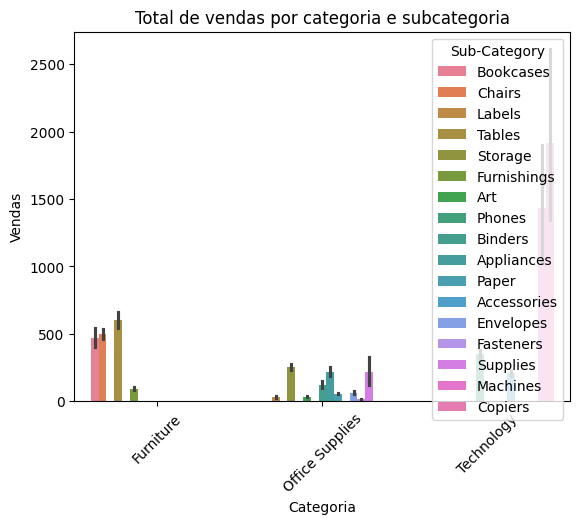

In [ ]:
sns.barplot(data=df, x='Category', y='Sales', hue='Sub-Category')
plt.title('Total de vendas por categoria e subcategoria')
plt.xlabel('Categoria')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.show()